In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('credit_risk.csv')
df

,default_label,age,gender,edu,housing,income,job_occupation,past_bad_credit,married
0,0,49,0,2,1,3782.410356,0,1,1
1,0,62,1,3,1,11516.000660,0,1,1
2,0,43,1,2,1,1746.632495,1,1,1
3,0,59,0,0,0,1195.975234,1,1,1
4,0,58,1,4,1,7217.466097,0,1,1
...,...,...,...,...,...,...,...,...,...
13977,0,36,1,2,1,6856.358688,0,1,0
13978,0,44,0,0,1,2245.684172,0,1,0
13979,0,47,0,1,1,14793.528320,0,1,1
13980,0,62,0,0,1,2118.337362,0,1,1


In [3]:
df['default_label'].sum() / len(df)

0.022028322128450864

# Simple Logistic Model

In [4]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')



AUC for logistic regression is: 0.589


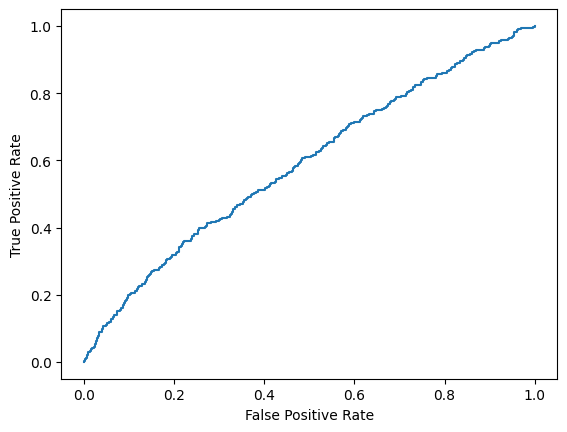

In [5]:
from sklearn.metrics import roc_auc_score
mod = LogisticRegression()
rres = mod.fit(y = df['default_label'], X=df[['past_bad_credit', 'income']])
default_label_pred = mod.predict(df[['past_bad_credit', 'income']])
plot_roc_curve(df['default_label'], mod.predict_proba(df[['past_bad_credit', 'income']])[:,1])
true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(df[['past_bad_credit', 'income']])[:, 1]


auc = roc_auc_score(true_labels, predicted_probabilities)
print("AUC for logistic regression is: {:.3f}".format(auc))



# Full Logistic Model

AUC for full logistics model is: 0.661


C:\Users\ly0001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


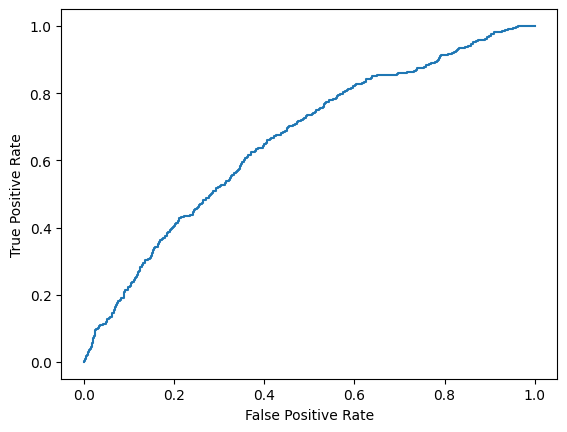

In [6]:
mod = LogisticRegression()
X=df.drop(columns=['default_label'])
rres = mod.fit(y = df['default_label'], X=X)
default_label_pred = mod.predict(X)
plot_roc_curve(df['default_label'], mod.predict_proba(X)[:,1])
true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(X)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print("AUC for full logistics model is: {:.3f}".format(auc))


In [7]:
#print(f"model 1 accuracy score: {mod.score(X, df['default_label'])}")
#auc = roc_auc_score(true_labels, predicted_probabilities)
#print("AUC for full logistics model is: {:.3f}".format(auc))

# SVM/ Random Forest

## SVM

AUC for RBF-kernel SVM is: 0.554


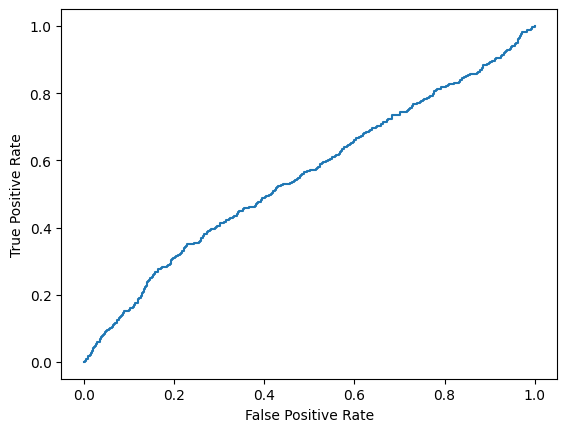

In [8]:
# SVM
mod = svm.SVC(probability=True)
rres = mod.fit(y = df['default_label'], X=X)
default_label_pred = mod.predict(X)
plot_roc_curve(df['default_label'], mod.predict_proba(X)[:,1])

true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(X)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print("AUC for RBF-kernel SVM is: {:.3f}".format(auc))

In [9]:
'''
# SVM using RBF kernel

mod = svm.SVC(class_weight='balanced',kernel='rbf', probability=True)
rres = mod.fit(y = df['default_label'], X=X)
default_label_pred = mod.predict(X)
plot_roc_curve(df['default_label'], mod.predict_proba(X)[:,1])

true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(X)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print("AUC for RBF-kernel SVM is: {:.3f}".format(auc))
# SVM
mod = svm.SVC(kernel='rbf', probability=True)
rres = mod.fit(y = df['default_label'], X=X)
default_label_pred = mod.predict(X)
plot_roc_curve(df['default_label'], mod.predict_proba(X)[:,1])
'''


'\n# SVM using RBF kernel\n\nmod = svm.SVC(class_weight=\'balanced\',kernel=\'rbf\', probability=True)\nrres = mod.fit(y = df[\'default_label\'], X=X)\ndefault_label_pred = mod.predict(X)\nplot_roc_curve(df[\'default_label\'], mod.predict_proba(X)[:,1])\n\ntrue_labels = df[\'default_label\']\npredicted_probabilities = mod.predict_proba(X)[:, 1]\nauc = roc_auc_score(true_labels, predicted_probabilities)\nprint("AUC for RBF-kernel SVM is: {:.3f}".format(auc))\n# SVM\nmod = svm.SVC(kernel=\'rbf\', probability=True)\nrres = mod.fit(y = df[\'default_label\'], X=X)\ndefault_label_pred = mod.predict(X)\nplot_roc_curve(df[\'default_label\'], mod.predict_proba(X)[:,1])\n'

In [10]:
#print(f"model 1 accuracy score: {accuracy_score(df['default_label'], default_label_pred)}")


AUC for RBF-kernel SVM is: 0.554


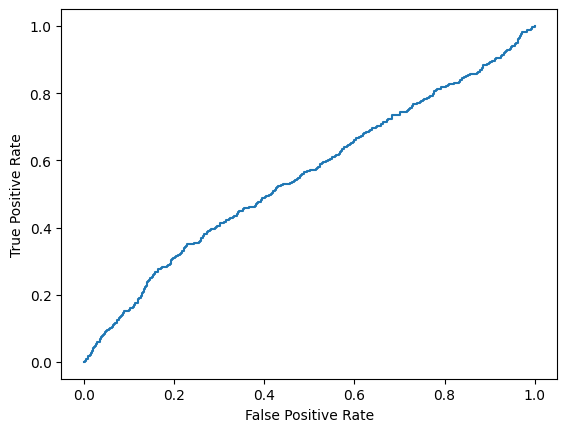

In [11]:
# RBF kernel SVM
mod = svm.SVC(kernel='rbf', probability=True)
rres = mod.fit(y = df['default_label'], X=X)
default_label_pred = mod.predict(X)
plot_roc_curve(df['default_label'], mod.predict_proba(X)[:,1])

true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(X)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print("AUC for RBF-kernel SVM is: {:.3f}".format(auc))

AUC for sigmoid-kernel SVM is: 0.560


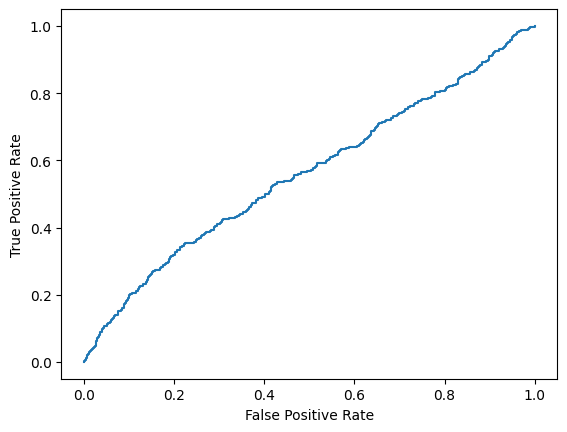

In [12]:
# sigmoid kernel SVM
mod = svm.SVC(class_weight='balanced',kernel='sigmoid', probability=True)
rres = mod.fit(y = df['default_label'], X=X)
default_label_pred = mod.predict(X)
plot_roc_curve(df['default_label'], mod.predict_proba(X)[:,1])

true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(X)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print("AUC for sigmoid-kernel SVM is: {:.3f}".format(auc))

AUC for polymial-kernel SVM is: 0.580


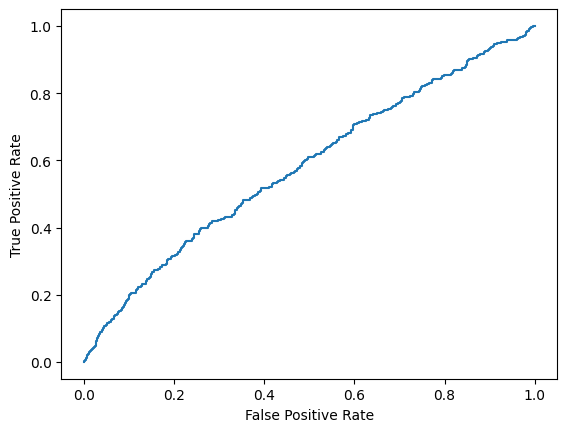

In [13]:
# polynomial kernel SVM
mod = svm.SVC(class_weight='balanced',kernel='poly', probability=True)
rres = mod.fit(y = df['default_label'], X=X)
default_label_pred = mod.predict(X)
plot_roc_curve(df['default_label'], mod.predict_proba(X)[:,1])

true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(X)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print("AUC for polymial-kernel SVM is: {:.3f}".format(auc))

# Out-of-Sample Test

In [14]:
df_train = df[:10000]
df_test = df[10001:]

## Logistic

## SVM

out-of-sample AUC for RBF-kernel SVM is: 0.551


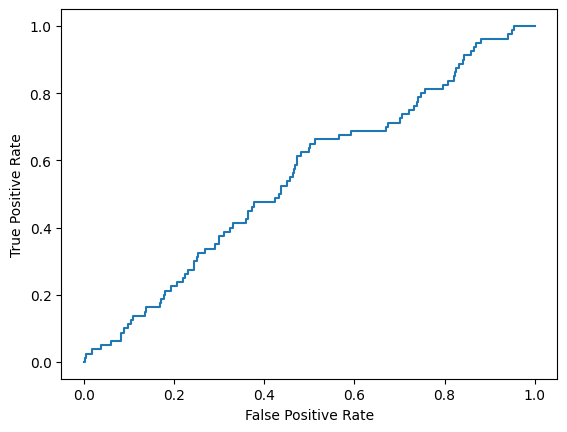

In [15]:
y = df_train['default_label']
X = df_train.drop(columns=['default_label'])
X_test = df_test.drop(columns=['default_label'])
y_test = df_test['default_label']
mod = svm.SVC(kernel='rbf', probability=True)
rres = mod.fit(y = y, X=X)
default_label_pred = mod.predict(X_test)
plot_roc_curve(y_test, mod.predict_proba(X_test)[:,1])
#print(f"model 1 accuracy score: {accuracy_score(y_test, default_label_pred)}")

true_labels = df_test['default_label']
predicted_probabilities = mod.predict_proba(X_test)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print("out-of-sample AUC for RBF-kernel SVM is: {:.3f}".format(auc))


## Random Forest

out-of-sample AUC for random forest is: 0.575


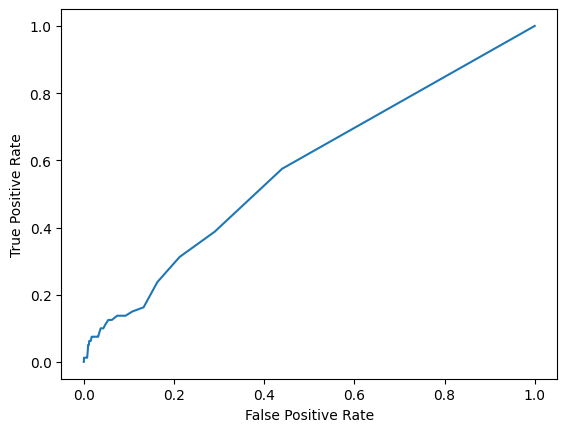

In [16]:
from sklearn.model_selection import GridSearchCV
y = df_train['default_label']
X = df_train.drop(columns=['default_label'])
X_test = df_test.drop(columns=['default_label'])
y_test = df_test['default_label']
mod = RandomForestClassifier()
rres = mod.fit(y = y, X=X)
default_label_pred = mod.predict(X_test)
plot_roc_curve(y_test, mod.predict_proba(X_test)[:,1])
#print(f"model 1 accuracy score: {accuracy_score(y_test, default_label_pred)}")

true_labels = df_test['default_label']
predicted_probabilities = mod.predict_proba(X_test)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print("out-of-sample AUC for random forest is: {:.3f}".format(auc))






Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best AUC on cross-validation: 0.6713400685211411
out-of-sample AUC for random forest with tuning parameter is: 0.6691729684696233


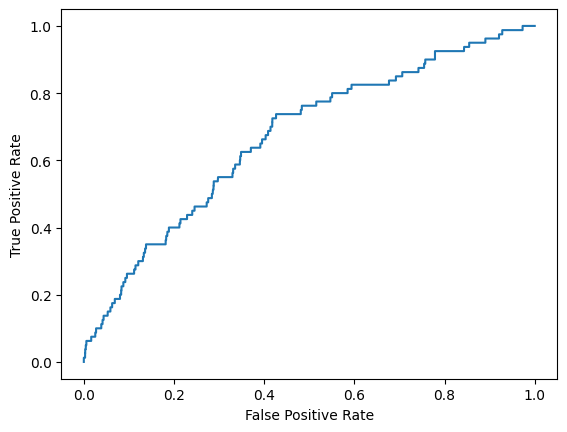

In [28]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]   
}

# Create the grid search object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the training data
grid_search.fit(X, y)

# Get the best parameters and best AUC score
best_params = grid_search.best_params_
best_auc = grid_search.best_score_

# Train the random forest model with the best parameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X, y)

# Predict probabilities and calculate AUC on the test data
test_predictions = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_predictions)

plot_roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

print("Best parameters:", best_params)
# print("Best AUC on cross-validation:", best_auc)
print("out-of-sample AUC for random forest with tuning parameter is: {:.3f}", test_auc)



## XGBoosting
Wu, W. (2022) Machine Learning Approaches to Predict Loan Default. Intelligent Information Management, 14, 157-164. doi: 10.4236/iim.2022.145011.


Accuracy: 0.9791509670936951
model 1 accuracy score: 0.9791509670936951
out-of-sample AUC for XGBoosting is: 0.574


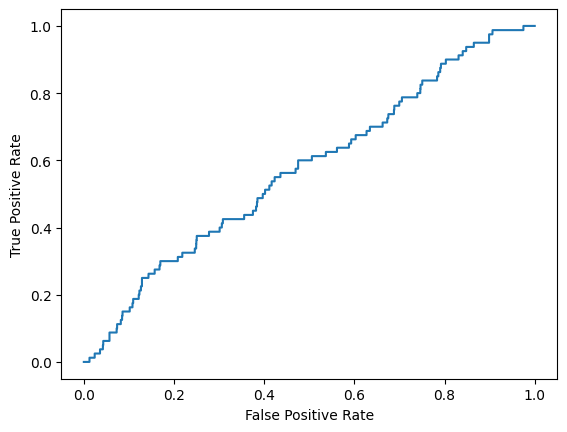

In [18]:
# Create an instance of the XGBoost classifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X, y)

# Make predictions on the testing data
xgb_predictions = xgb_model.predict(X_test)

# Print the accuracy score
accuracy = accuracy_score(y_test, xgb_predictions)
print(f"Accuracy: {accuracy}")

# Plot the ROC curve
default_label_pred = xgb_model.predict(X_test)
plot_roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
print(f"model 1 accuracy score: {accuracy_score(y_test, default_label_pred)}")

# Print AUC
true_labels = df_test['default_label']
predicted_probabilities = xgb_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print("out-of-sample AUC for XGBoosting is: {:.3f}".format(auc))




Accuracy: 0.9799045465963325
model 1 accuracy score: 0.9799045465963325
out-of-sample AUC for XGBoosting is: 0.649


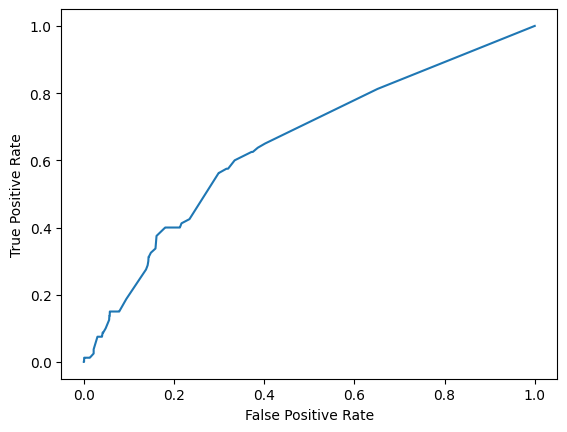

In [25]:
# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Create an instance of the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Create a GridSearchCV object with the XGBoost classifier and parameter grid
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(X, y)

# Get the best parameters and best AUC score
best_params = grid_search.best_params_
best_auc = grid_search.best_score_

# Create a new instance of the XGBoost classifier with the best parameters
best_model = xgb.XGBClassifier(**best_params)

# Fit the best model on the training data
best_model.fit(X, y)

# Make predictions on the testing data
xgb_predictions = best_model.predict(X_test)

# Print the accuracy score
accuracy = accuracy_score(y_test, xgb_predictions)
#print(f"Accuracy: {accuracy}")

# Plot the ROC curve
plot_roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
#print(f"model 1 accuracy score: {accuracy_score(y_test, xgb_predictions)}")

# Print the out-of-sample AUC
true_labels = df_test['default_label']
predicted_probabilities = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print("out-of-sample AUC for XGBoosting with tuning parameters is: {:.3f}".format(auc))


## Logistic regression

model 1 accuracy score: 0.9799045465963325
out-of-sample AUC for logistic regression is: 0.576


C:\Users\ly0001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


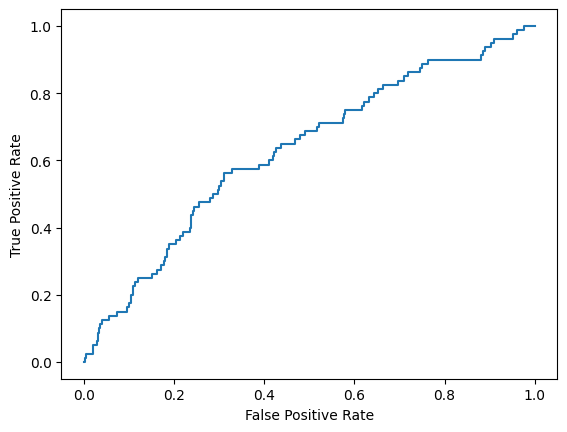

In [23]:
from sklearn.model_selection import GridSearchCV
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X, y)

# Make predictions on the test data
logreg_predictions = logreg.predict(X_test)

# Calculate accuracy score
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# Plot the ROC curve
default_label_pred = logreg.predict(X_test)
plot_roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
print(f"model 1 accuracy score: {accuracy_score(y_test, default_label_pred)}")

# Calculate AUC
logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Print the results
#print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print("out-of-sample AUC for logistic regression is: {:.3f}".format(auc))



C:\Users\ly0001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ly0001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

Best parameters: {'C': 1}
Out-of-sample AUC for logistic regression with tuning parameter: 0.6291752114842347


C:\Users\ly0001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


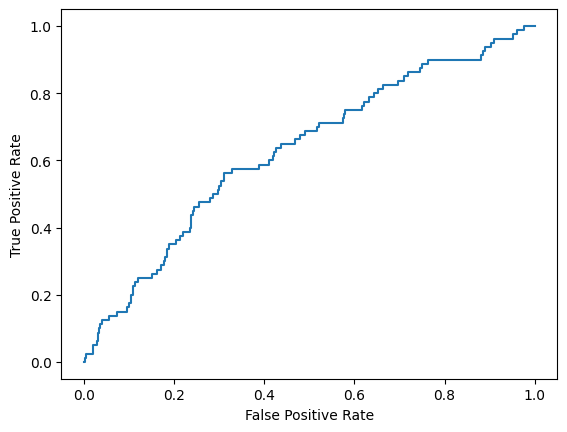

In [27]:
# adding tuning parameter
# Define the logistic regression model
logreg = LogisticRegression()

# Define the parameter grid for tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the model on the training data
grid_search.fit(X, y)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
logreg_predictions = best_model.predict(X_test)

# Calculate accuracy score
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# Plot the ROC curve
plot_roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

# Calculate AUC
logreg_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Print the results
print("Best parameters:", best_params)
print("Out-of-sample AUC for logistic regression with tuning parameter: {:.3f}", logreg_auc)



## Neural Network

@article{cite-key,
	abstract = {Default prediction is the primary goal of credit risk management. This problem has long been tackled using well-established statistical classification models. Still, nowadays, the availability of large datasets and cheap software implementations makes it possible to employ machine learning techniques. This paper uses a large sample of small Italian companies to compare the performance of various machine learning classifiers and a more traditional logistic regression approach. In particular, we perform feature selection, use the algorithms for default prediction, evaluate their accuracy, and find a more suitable threshold as a function of sensitivity and specificity. Our outcomes suggest that machine learning is slightly better than logistic regression. However, the relatively small performance gain is insufficient to conclude that classical statistical classifiers should be abandoned, as they are characterized by more straightforward interpretation and implementation.},
	author = {Bazzana, Flavio and Bee, Marco and Hussin Adam Khatir, Ahmed Almustfa},
	date = {2023/11/15},
	date-added = {2024-04-18 21:22:55 +0800},
	date-modified = {2024-04-18 21:22:55 +0800},
	doi = {10.1057/s41283-023-00132-2},
	id = {Bazzana2023},
	isbn = {1743-4637},
	journal = {Risk Management},
	number = {1},
	pages = {1},
	title = {Machine learning techniques for default prediction: an application to small Italian companies},
	url = {https://doi.org/10.1057/s41283-023-00132-2},
	volume = {26},
	year = {2023},
	bdsk-url-1 = {https://doi.org/10.1057/s41283-023-00132-2}}


model 1 accuracy score: 0.9799045465963325
out-of-sample AUC for Neural Network is: 0.394


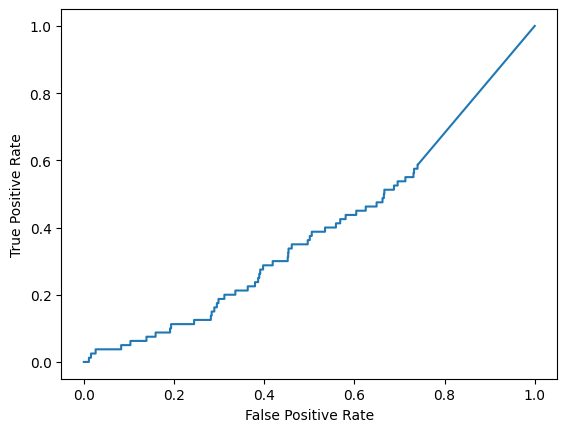

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
y = df_train['default_label']
X = df_train.drop(columns=['default_label'])
X_test = df_test.drop(columns=['default_label'])
y_test = df_test['default_label']
mod = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000)
rres = mod.fit(y = y, X=X)
default_label_pred = mod.predict(X_test)
plot_roc_curve(y_test, mod.predict_proba(X_test)[:,1])
print(f"model 1 accuracy score: {accuracy_score(y_test, default_label_pred)}")

# Print AUC
true_labels = df_test['default_label']
predicted_probabilities = mod.predict_proba(X_test)[:, 1]
auc = roc_auc_score(true_labels, predicted_probabilities)
print("out-of-sample AUC for Neural Network is: {:.3f}".format(auc))



Out-of-sample AUC for Neural Network with tuned parameters is: 0.576


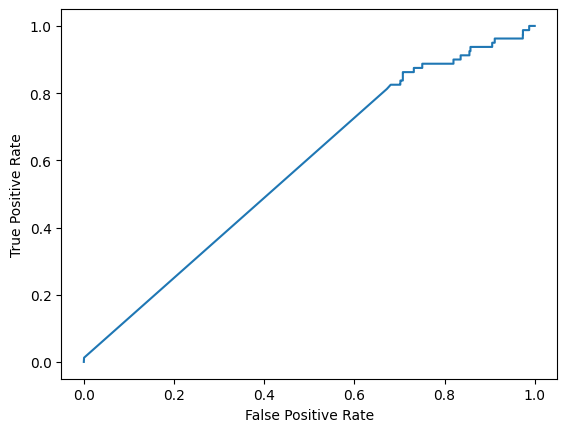

In [22]:
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import plot_roc_curve
# adding tuning parameters
# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create the MLPClassifier
mod = MLPClassifier(max_iter=1000)

# Create the GridSearchCV object
grid_search = GridSearchCV(mod, param_grid, scoring='roc_auc', cv=5)

# Fit the model with the training data
grid_search.fit(X, y)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the probabilities for the test data
predicted_probabilities = best_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc = roc_auc_score(y_test, predicted_probabilities)
print("Out-of-sample AUC for Neural Network with tuned parameters is: {:.3f}".format(auc))

'''import matplotlib.pyplot as plt
# Assuming you have the true labels and predicted probabilities
true_labels = df['default_label']
predicted_probabilities = mod.predict_proba(X)[:, 1]

# Plot the ROC curve
plot_roc_curve(mod, X, true_labels)
plt.show()'''

# Plot the ROC curve
default_label_pred = best_model.predict(X_test)
plot_roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
